In [28]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjust the configuration of the plots we will create

# Read in data
df = pd.read_csv(r'C:\Users\antua\Downloads\movies.csv\movies.csv')






In [16]:
# Let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [30]:
# Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [32]:
# Data Types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [54]:
# change data type of columns
# df['budget'] = df['budget'].astype('int64')
# df['gross'] = df['gross'].astype('int64')

# Fill NaN values with 0
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')




In [156]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0    29       696    7.8  1100000      1155    1778   
7445   535       5      0    39       183    8.4   903000       162     743   
3045  6896       5      6    17       704    7.8  1100000      1155    1778   
6663  5144       5      0    35       698    7.8   876000      1125    2550   
7244   536       5      0    38       192    8.4   897000       162     743   

      star  country     budget       gross  company  runtime  year_correct  
5445  2334       55  237000000  2847246203     2253    162.0            29  
7445  2241       55  356000000  2797501328     1606    181.0            39  
3045  1595       55  200000000  2201647264     2253    194.0            17  
6663   524       55  245000000  2069521700     1540    138.0            35  
7244  2241       55  321000000  2048359754     1606    149.0            38

In [158]:
# Create correct year column
# Split by space and extract the year
df['year_correct'] = df['released'].astype(str).str.split(', ').str[-1].str[:4]
df.head()


name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0    29       696    7.8  1100000      1155    1778   
7445   535       5      0    39       183    8.4   903000       162     743   
3045  6896       5      6    17       704    7.8  1100000      1155    1778   
6663  5144       5      0    35       698    7.8   876000      1125    2550   
7244   536       5      0    38       192    8.4   897000       162     743   

      star  country     budget       gross  company  runtime year_correct  
5445  2334       55  237000000  2847246203     2253    162.0          696  
7445  2241       55  356000000  2797501328     1606    181.0          183  
3045  1595       55  200000000  2201647264     2253    194.0          704  
6663   524       55  245000000  2069521700     1540    138.0          698  
7244  2241       55  321000000  2048359754     1606    149.0          192

In [108]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [110]:
pd.set_option('display.min_rows', 50)

In [112]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [160]:
df.head()


name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0    29       696    7.8  1100000      1155    1778   
7445   535       5      0    39       183    8.4   903000       162     743   
3045  6896       5      6    17       704    7.8  1100000      1155    1778   
6663  5144       5      0    35       698    7.8   876000      1125    2550   
7244   536       5      0    38       192    8.4   897000       162     743   

      star  country     budget       gross  company  runtime year_correct  
5445  2334       55  237000000  2847246203     2253    162.0          696  
7445  2241       55  356000000  2797501328     1606    181.0          183  
3045  1595       55  200000000  2201647264     2253    194.0          704  
6663   524       55  245000000  2069521700     1540    138.0          698  
7244  2241       55  321000000  2048359754     1606    149.0          192

In [78]:
# Budget high correlation
# Company High correlation



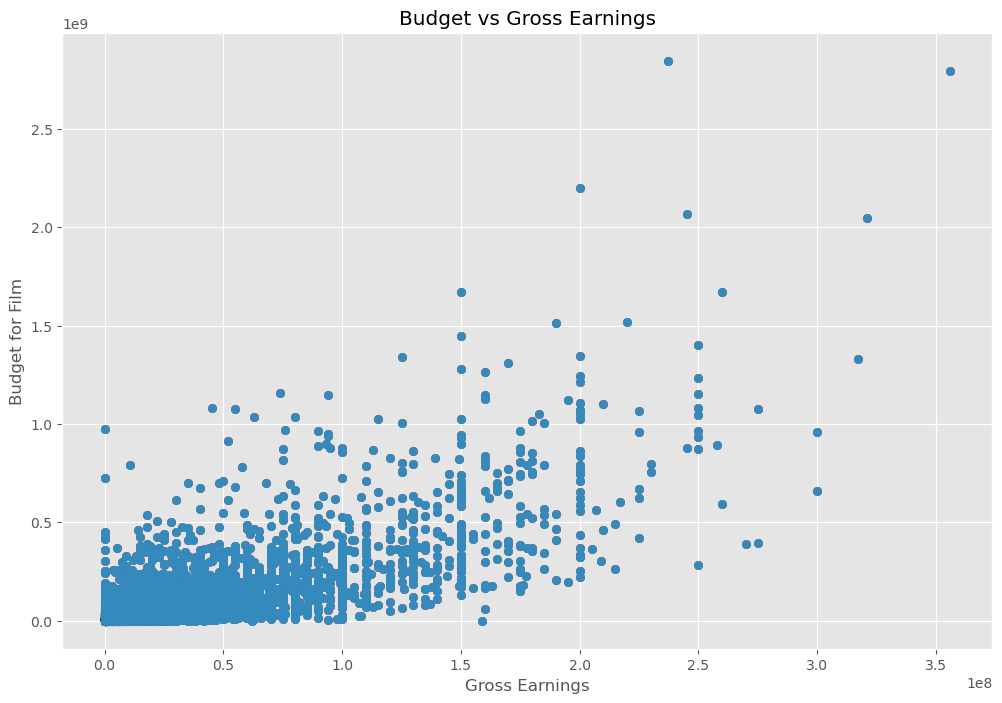

In [100]:
# Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')


plt.show()

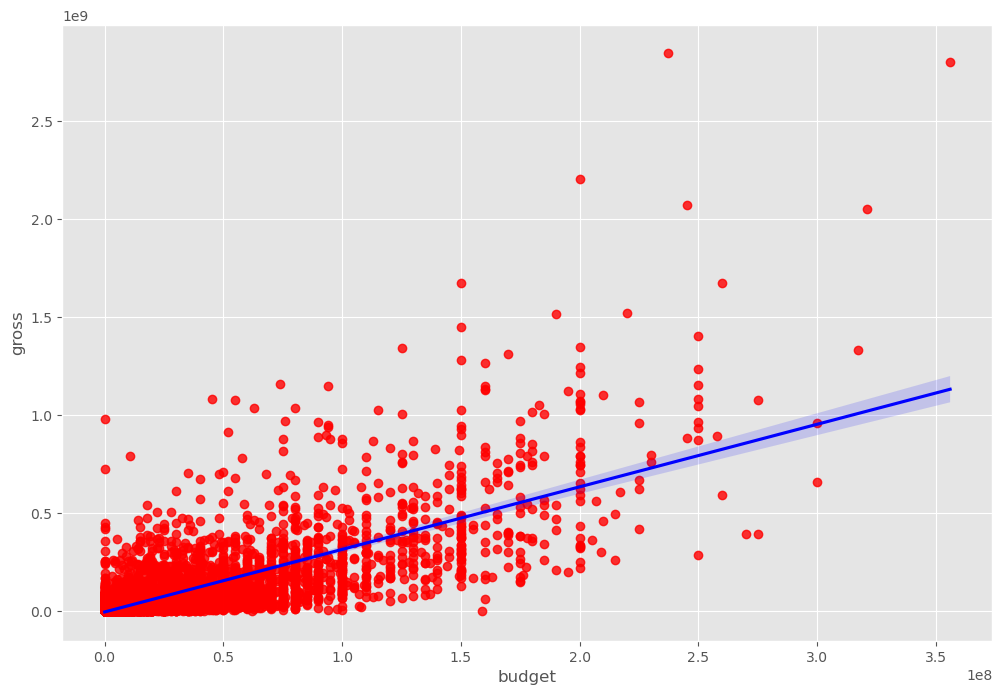

In [122]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.show()




In [132]:
df.corr(method = 'spearman', numeric_only ='True')

score     votes    budget     gross   runtime
score    1.000000  0.428138 -0.007500  0.132569  0.399857
votes    0.428138  1.000000  0.604693  0.752550  0.289726
budget  -0.007500  0.604693  1.000000  0.716816  0.246748
gross    0.132569  0.752550  0.716816  1.000000  0.256783
runtime  0.399857  0.289726  0.246748  0.256783  1.000000

In [134]:
# High correlation between budget and gross 
# I was right


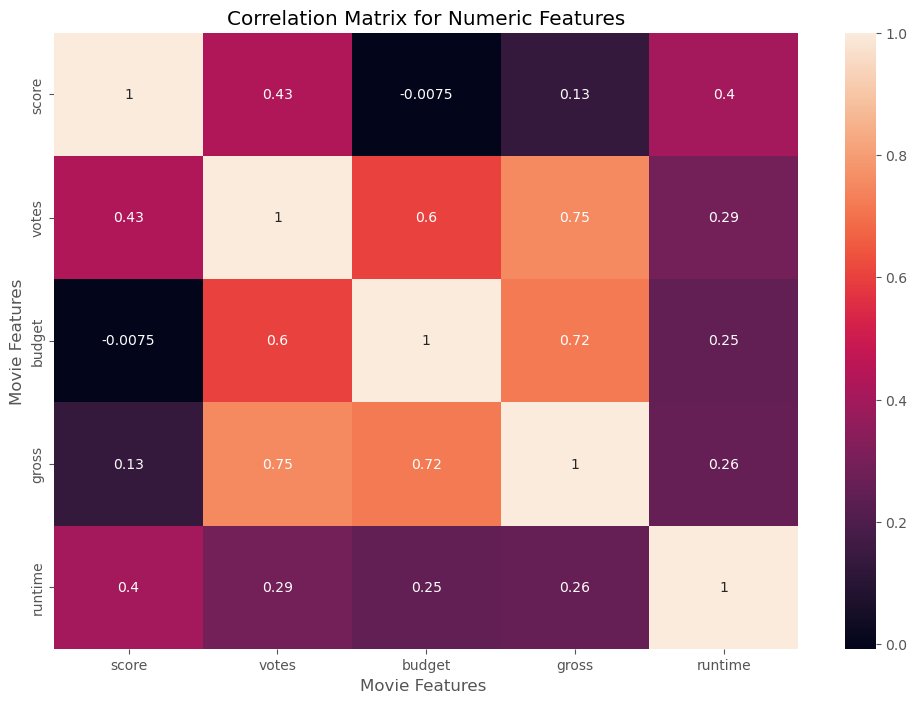

In [142]:
correlation_matrix = df.corr(method = 'spearman', numeric_only ='True')

sns.heatmap(correlation_matrix, annot = True) 

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features ')

plt.ylabel('Movie Features')

plt.show()
            

In [144]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year_correct  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

In [146]:
df_numerized = df

for col_name in df_numerized:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized 

name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0    29       696    7.8  1100000      1155    1778   
7445   535       5      0    39       183    8.4   903000       162     743   
3045  6896       5      6    17       704    7.8  1100000      1155    1778   
6663  5144       5      0    35       698    7.8   876000      1125    2550   
7244   536       5      0    38       192    8.4   897000       162     743   
7480  6194       4      2    39      1488    6.9   222000      1455    1919   
6653  2969       5      0    35      1704    7.0   593000       517    3568   
6043  5502       5      0    32      2472    8.0  1300000      1517    2314   
6646  2145       5      0    35       221    7.1   370000      1189     706   
7494  2131       4      2    39      2676    6.8   148000       432    1950   
6644   534       5      0    35      2235    7.3   777000      1517    2314   
7247   791       5      0    38       959    7.3   661000      2457    3795   
5845  2407       5      1    31      1445    8.1   790000       679    4052   
7075  5145       5      0    37       661    7.0   581000      2282    3518   
7271  2970       5      0    38      1799    6.2   277000      1121    1093   
6262  2130       4      2    33      2715    7.4   585000       432    1950   
7072   657       4      7    37      2022    7.1   283000       250    4000   
7281  2760       4      2    38      1729    7.6   263000       303     491   
7055  5833       5      0    37        61    6.6   214000       835    1431   
6244  2823       5      0    33      2449    7.1   779000      2543    1174   
6688  3622       4      2    35      1395    6.4   218000      1639     534   
6846  1056       5      0    36      2488    7.8   694000       162     743   
7250   474       5      0    38       748    6.9   404000      1189     990   
4245  6221       5      0    23       680    8.9  1700000      2193    1745   
7458  5084       5      0    39      1501    7.5   359000      1463     704   
7456  1061       5      0    39      2213    6.8   478000       147     255   
5878  6968       5      0    31      1870    6.2   390000      1886    1237   
6059  4951       5      0    32      2804    7.7   642000      2476    3125   
6494  6967       5      0    34      1849    5.6   302000      1886    1237   
2448  6194       1      2    14      1811    8.5   970000      2415    1702   
6047  5726       5      0    32      1510    8.4  1600000       483    2265   
7463  5141       5      0    39       731    6.5   394000      1125     714   
7450  2930       6      5    39      3062    8.4  1000000      2767    4248   
7488  6949       1      2    39      1787    7.7   217000      1509    2158   
5685  6948       1      2    30      1752    8.2   776000      1678    2158   
4852  4258       5      0    26      1645    7.3   668000       996    4147   
6869  4616       5      0    36       673    7.8   572000       912     717   
7481   290       4      1    39      2394    6.9   239000      1031    2078   
5860  4261       5      0    31      2350    6.6   492000      2341    4147   
7140  1552       4      2    37      1896    6.3   119000      1639     758   
2245  2967       5      0    13      1689    8.1   894000      2660    2931   
6908  1978       4      2    36      1744    7.3   250000       124     215   
3451  5138       4      0    19      2318    6.5   748000       963    1472   
5667   300       4      1    30      2182    6.4   392000      2745    2607   
6863  7504       4      2    36      2175    8.0   450000       362     576   
6045  6001       5      1    32       651    7.8   773000      2193    1359   
3843  2412       4      1    21      2593    7.6   685000       435    1741   
5243  5725       5      0    28      1476    9.0  2400000       483    2265   
5652  2406       5      1    30      2620    7.7   495000       679    4052   
6311  1551       4      2    33      1599    7.3   37700

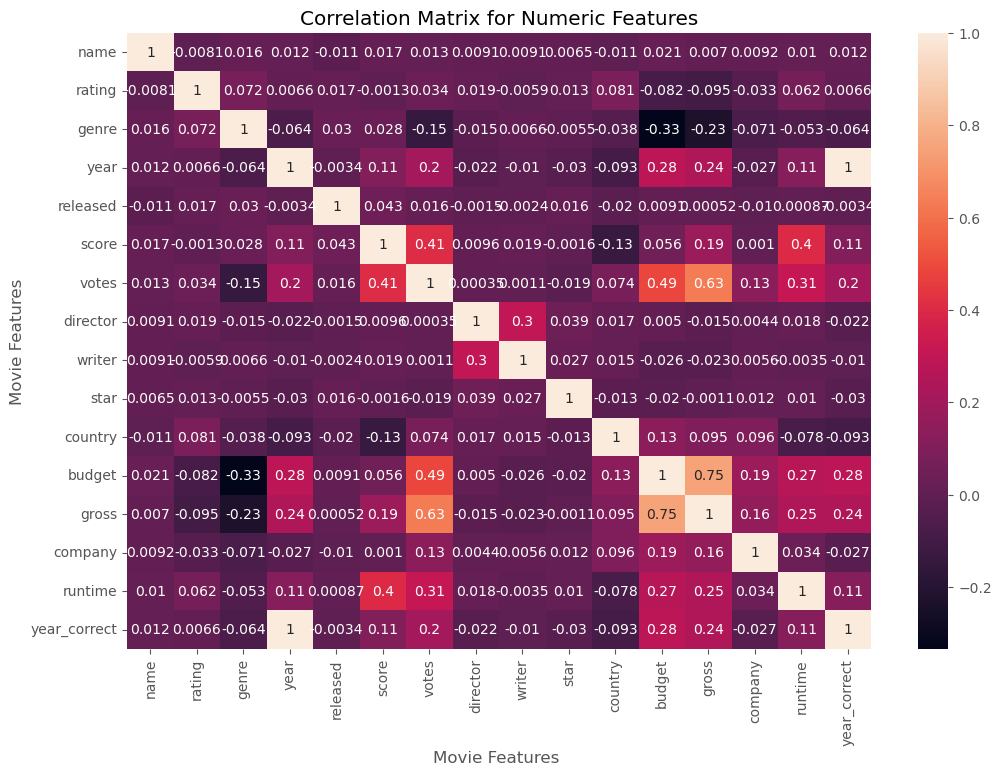

In [148]:
correlation_matrix = df_numerized.corr(method = 'pearson', numeric_only ='True')

sns.heatmap(correlation_matrix, annot = True) 

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features ')

plt.ylabel('Movie Features')

plt.show()

In [150]:
correlation_mat = df_numerized.corr(numeric_only = 'True')

corr_pairs = correlation_mat.unstack()

corr_pairs 

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011711
              released       -0.011311
              score           0.017097
              votes           0.013038
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.010392
              year_correct    0.011711
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.006560
              released        0.016613
              score          -0.001314
              votes           0.033743
              director        0.019483
              writer         -0.005921
              star       

In [152]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
gross         genre          -0.234297
genre         gross          -0.234297
votes         genre          -0.145296
genre         votes          -0.145296
country       score          -0.133348
score         country        -0.133348
gross         rating         -0.095450
rating        gross          -0.095450
year_correct  country        -0.092522
country       year_correct   -0.092522
              year           -0.092522
year          country        -0.092522
budget        rating         -0.081939
rating        budget         -0.081939
country       runtime        -0.078412
runtime       country        -0.078412
company       genre          -0.071067
genre         company        -0.071067
              year_correct   -0.064337
year_correct  genre          -0.064337
genre         year           -0.064337
year          genre          -0.064337
genre         runtime        -0.052711
runtime       genre      

In [154]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.632870
votes         gross           0.632870
budget        gross           0.750157
gross         budget          0.750157
year_correct  year            1.000000
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year_correct    1.000000
              year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings 

# Company has low correlation 
# I was wrong 